In [61]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

# Chinese Product Total Market

### Market Prediction by Import From China (overview)

In [62]:
URL = "https://www.census.gov/foreign-trade/balance/c5700.html"
scraper = pd.read_html(URL)
for idx, table in enumerate(scraper):
    print("********************************************************")
    print(idx)
    print(table.T)

********************************************************
0
                    0              1           2           3         4  \
Month    January 2021  February 2021  March 2021  April 2021  May 2021   
Exports       12860.9         9410.5     12542.3     11759.9   12411.3   
Imports       39111.2        34027.4       40229     37589.8   38732.1   
Balance      -26250.2         -24617    -27686.7    -25829.9  -26320.7   

                 5          6            7               8             9  \
Month    June 2021  July 2021  August 2021  September 2021  October 2021   
Exports      12102      11720      11258.7         10910.6       16635.3   
Imports      39946    40368.3      42997.3           47414       48032.2   
Balance   -27843.9   -28648.3     -31738.7        -36503.4      -31396.8   

                    10             11          12  
Month    November 2021  December 2021  TOTAL 2021  
Exports          16069        13384.7      151065  
Imports          48385        495

In [63]:
df2021 = scraper[0]
df2020 = scraper[1]
df2019 = scraper[2]
df2018 = scraper[3]
df2017 = scraper[4]
df2016 = scraper[5]
df2015 = scraper[6]
df2014 = scraper[7]
df2013 = scraper[8]
df2012 = scraper[9]

In [64]:
df3 = [df2021,df2020, df2019, df2018,df2017,df2016,df2015,df2014,df2013,df2012] # combine 10 years' tables
total = pd.concat(df3)
total_all = total[total['Month'].str.contains('TOTAL')] # extract the rows about the total trade
t1 = total_all.rename(columns = {'Month':'Year'}) # rename column 
t1

,Year,Exports,Imports,Balance
12,TOTAL 2021,151065.2,506366.9,-355301.7
12,TOTAL 2020,124485.4,434749.0,-310263.5
12,TOTAL 2019,106448.4,450760.4,-344312.0
12,TOTAL 2018,120281.2,538514.2,-418232.9
12,TOTAL 2017,129997.2,505165.1,-375167.9
12,TOTAL 2016,115594.8,462420.0,-346825.2
12,TOTAL 2015,115873.4,483201.7,-367328.3
12,TOTAL 2014,123657.2,468474.9,-344817.7
12,TOTAL 2013,121746.2,440430.0,-318683.8
12,TOTAL 2012,110516.6,425619.1,-315102.5


In [65]:
t2 = t1.reset_index()
t3 = t2.drop(['index'], axis = 1)
t3

,Year,Exports,Imports,Balance
0,TOTAL 2021,151065.2,506366.9,-355301.7
1,TOTAL 2020,124485.4,434749.0,-310263.5
2,TOTAL 2019,106448.4,450760.4,-344312.0
3,TOTAL 2018,120281.2,538514.2,-418232.9
4,TOTAL 2017,129997.2,505165.1,-375167.9
5,TOTAL 2016,115594.8,462420.0,-346825.2
6,TOTAL 2015,115873.4,483201.7,-367328.3
7,TOTAL 2014,123657.2,468474.9,-344817.7
8,TOTAL 2013,121746.2,440430.0,-318683.8
9,TOTAL 2012,110516.6,425619.1,-315102.5


In [66]:
t3.describe()

,Exports,Imports,Balance
count,10.000000,10.000000,10.000000
mean,121966.560000,471570.130000,-349603.550000
std,12351.134191,36392.291308,32425.600935
min,106448.400000,425619.100000,-418232.900000
25%,115664.450000,443012.600000,-364321.650000
50%,121013.700000,465447.450000,-345821.450000
75%,124278.350000,499674.250000,-325090.850000
max,151065.200000,538514.200000,-310263.500000


In [67]:
t3.at[0,'Imports'] = 456832.2+39530  # count 11 (actual) + Dec estimatet
t3

,Year,Exports,Imports,Balance
0,TOTAL 2021,151065.2,496362.2,-355301.7
1,TOTAL 2020,124485.4,434749.0,-310263.5
2,TOTAL 2019,106448.4,450760.4,-344312.0
3,TOTAL 2018,120281.2,538514.2,-418232.9
4,TOTAL 2017,129997.2,505165.1,-375167.9
5,TOTAL 2016,115594.8,462420.0,-346825.2
6,TOTAL 2015,115873.4,483201.7,-367328.3
7,TOTAL 2014,123657.2,468474.9,-344817.7
8,TOTAL 2013,121746.2,440430.0,-318683.8
9,TOTAL 2012,110516.6,425619.1,-315102.5


In [107]:
T = t3.sort_values(by = 'Year', ascending = True)
T['Year'] = T['Year'].str.replace('TOTAL', ' ')
T0 = T.reset_index()
T1 = T0.drop(['index'], axis = 1)
print('Current 10 Years USA Trading with China ')
print('All figures are in millions of U.S. dollars on a nominal basis')
T1

Current 10 Years USA Trading with China 
All figures are in millions of U.S. dollars on a nominal basis


,Year,Exports,Imports,Balance
0,2012,110516.6,425619.1,-315102.5
1,2013,121746.2,440430.0,-318683.8
2,2014,123657.2,468474.9,-344817.7
3,2015,115873.4,483201.7,-367328.3
4,2016,115594.8,462420.0,-346825.2
5,2017,129997.2,505165.1,-375167.9
6,2018,120281.2,538514.2,-418232.9
7,2019,106448.4,450760.4,-344312.0
8,2020,124485.4,434749.0,-310263.5
9,2021,151065.2,496362.2,-355301.7


In [69]:
T1.describe()# import mean is around 470569 

,Exports,Imports,Balance
count,10.000000,10.000000,10.000000
mean,121966.560000,470569.660000,-349603.550000
std,12351.134191,35454.841278,32425.600935
min,106448.400000,425619.100000,-418232.900000
25%,115664.450000,443012.600000,-364321.650000
50%,121013.700000,465447.450000,-345821.450000
75%,124278.350000,493072.075000,-325090.850000
max,151065.200000,538514.200000,-310263.500000


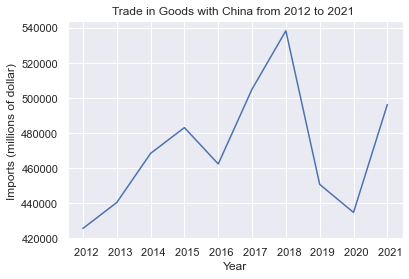

In [70]:
plt.plot(T1.Year, T1.Imports)
plt.title('Trade in Goods with China from 2012 to 2021 ')
plt.xlabel('Year')
plt.ylabel('Imports (millions of dollar) ')
plt.show()

In [71]:
snack = T1['Imports'] * 0.05
T1['Snack_Comsumption'] = snack.astype(int)
T1['Year'] = T1['Year'].astype(int)
T1

,Year,Exports,Imports,Balance,Snack_Comsumption
0,2012,110516.6,425619.1,-315102.5,21280
1,2013,121746.2,440430.0,-318683.8,22021
2,2014,123657.2,468474.9,-344817.7,23423
3,2015,115873.4,483201.7,-367328.3,24160
4,2016,115594.8,462420.0,-346825.2,23121
5,2017,129997.2,505165.1,-375167.9,25258
6,2018,120281.2,538514.2,-418232.9,26925
7,2019,106448.4,450760.4,-344312.0,22538
8,2020,124485.4,434749.0,-310263.5,21737
9,2021,151065.2,496362.2,-355301.7,24818


In [72]:
T1.dtypes

Year                   int32
Exports              float64
Imports              float64
Balance              float64
Snack_Comsumption      int32
dtype: object

In [73]:
T1.describe()

,Year,Exports,Imports,Balance,Snack_Comsumption
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,2016.50000,121966.560000,470569.660000,-349603.550000,23528.100000
std,3.02765,12351.134191,35454.841278,32425.600935,1772.789418
min,2012.00000,106448.400000,425619.100000,-418232.900000,21280.000000
25%,2014.25000,115664.450000,443012.600000,-364321.650000,22150.250000
50%,2016.50000,121013.700000,465447.450000,-345821.450000,23272.000000
75%,2018.75000,124278.350000,493072.075000,-325090.850000,24653.500000
max,2021.00000,151065.200000,538514.200000,-310263.500000,26925.000000


In [74]:
# overall and after 2020
T2 = T1
T2['Imports_pct_change'] = T1['Imports'].pct_change()
T2

,Year,Exports,Imports,Balance,Snack_Comsumption,Imports_pct_change
0,2012,110516.6,425619.1,-315102.5,21280,NaN
1,2013,121746.2,440430.0,-318683.8,22021,0.034798
2,2014,123657.2,468474.9,-344817.7,23423,0.063676
3,2015,115873.4,483201.7,-367328.3,24160,0.031436
4,2016,115594.8,462420.0,-346825.2,23121,-0.043008
5,2017,129997.2,505165.1,-375167.9,25258,0.092438
6,2018,120281.2,538514.2,-418232.9,26925,0.066016
7,2019,106448.4,450760.4,-344312.0,22538,-0.162955
8,2020,124485.4,434749.0,-310263.5,21737,-0.035521
9,2021,151065.2,496362.2,-355301.7,24818,0.141721


In [75]:
T2.describe()

,Year,Exports,Imports,Balance,Snack_Comsumption,Imports_pct_change
count,10.00000,10.000000,10.000000,10.000000,10.000000,9.000000
mean,2016.50000,121966.560000,470569.660000,-349603.550000,23528.100000,0.020956
std,3.02765,12351.134191,35454.841278,32425.600935,1772.789418,0.090108
min,2012.00000,106448.400000,425619.100000,-418232.900000,21280.000000,-0.162955
25%,2014.25000,115664.450000,443012.600000,-364321.650000,22150.250000,-0.035521
50%,2016.50000,121013.700000,465447.450000,-345821.450000,23272.000000,0.034798
75%,2018.75000,124278.350000,493072.075000,-325090.850000,24653.500000,0.066016
max,2021.00000,151065.200000,538514.200000,-310263.500000,26925.000000,0.141721


In [76]:
# before the 2020
T3 = T2[:8]
T3

,Year,Exports,Imports,Balance,Snack_Comsumption,Imports_pct_change
0,2012,110516.6,425619.1,-315102.5,21280,NaN
1,2013,121746.2,440430.0,-318683.8,22021,0.034798
2,2014,123657.2,468474.9,-344817.7,23423,0.063676
3,2015,115873.4,483201.7,-367328.3,24160,0.031436
4,2016,115594.8,462420.0,-346825.2,23121,-0.043008
5,2017,129997.2,505165.1,-375167.9,25258,0.092438
6,2018,120281.2,538514.2,-418232.9,26925,0.066016
7,2019,106448.4,450760.4,-344312.0,22538,-0.162955


In [77]:
T3.describe()

,Year,Exports,Imports,Balance,Snack_Comsumption,Imports_pct_change
count,8.00000,8.000000,8.000000,8.000000,8.000000,7.000000
mean,2015.50000,118014.375000,471823.175000,-353808.787500,23590.750000,0.011772
std,2.44949,7511.145121,36552.245835,33254.850853,1827.635455,0.088120
min,2012.00000,106448.400000,425619.100000,-418232.900000,21280.000000,-0.162955
25%,2013.75000,114325.250000,448177.800000,-369288.200000,22408.750000,-0.005786
50%,2015.50000,118077.300000,465447.450000,-345821.450000,23272.000000,0.034798
75%,2017.25000,122223.950000,488692.550000,-337904.950000,24434.500000,0.064846
max,2019.00000,129997.200000,538514.200000,-315102.500000,26925.000000,0.092438


Overall % change: 2.1 % 
Before the pandemic (2020), the average % change: 1.2 %
After pandemic(2021), % change: 14.17%.

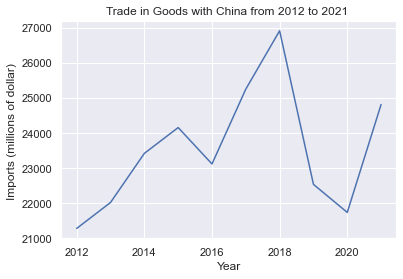

In [78]:
plt.plot(T1.Year, T1.Snack_Comsumption)
plt.title('Trade in Goods with China from 2012 to 2021 ')
plt.xlabel('Year')
plt.ylabel('Imports (millions of dollar) ')
plt.show()

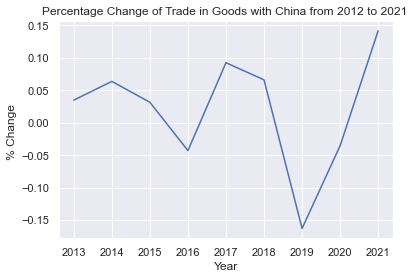

In [79]:
plt.plot(T2.Year, T2.Imports_pct_change)
plt.title('Percentage Change of Trade in Goods with China from 2012 to 2021 ')
plt.xlabel('Year')
plt.ylabel('% Change ')
plt.show()

resources : https://www.mda.state.mn.us/sites/default/files/inline-files/profilechina.pdf

#### Conclusion


- Overall imports % change: 2.1 % 
- Before the pandemic (2020), the average % change: 1.2 %
- After pandemic(2021), % change: 14.17%.

During 2012 to 2021, the average US'Trading in Goods wirh China is around 471 billions. And According to the report of Department of Agriculture, snack food takes up 5% of U.S. average imports from China. Therefore, we predict there is 23.6 billions for chinese snack market).  

### Market Prediction by Chinses Population 

In [162]:
URL1 = "https://www.pewresearch.org/social-trends/fact-sheet/asian-americans-chinese-in-the-u-s/#chinese-population-in-the-u-s--2000-2019"
#Data about Cricket World cup
population = pd.read_html(URL1)
print("There are : ",len(population)," tables")
print("Chinese population in the U.S., 2000-2019")
df_pop = population[0]
df_pop

There are :  9  tables
Chinese population in the U.S., 2000-2019


,Year,Population
0,2000,2865000
1,2010,4010000
2,2015,4948000
3,2019,5399000


Base on the research of OnePoll, America make an average 12 impulse purchases and spend an average $ 276 per month  (2019: $ 183 per month) in online shopping. Also, Food/groceries take up 48%. 
reference: https://swnsdigital.com/us/2021/05/the-average-american-makes-12-impulse-purchases-a-year-according-to-new-research/

In [81]:
print('total online shopping market for chinese food & groceries in 2019 is',5399000 * 12 * 276 * 0.48)

total online shopping market for chinese food & groceries in 2019 is 8583114240.0


In [82]:
(5399000 * 12 * 276 * 0.48 ) / 23590750000

0.36383388573911385

#### Conclusion
  The total online shopping market for chinese food & groceries in 2019 is 8.6 billions. It takes up around 36 % total chinese snacks selling. 
  

### Main Selling Place

In [83]:
URL2 = "https://www.pewresearch.org/social-trends/chart/top-10-u-s-metropolitan-areas-by-chinese-population-2019/"
#Data about Cricket World cup
population = pd.read_html(URL2)
print("There are : ",len(population)," tables")
print("Top 10 U.S. metropolitan areas by Chinese population, 2019")
df_pop = population[0]
df_pop

There are :  1  tables
Top 10 U.S. metropolitan areas by Chinese population, 2019


,City,Chinese population
0,New York,865000
1,Los Angeles,678000
2,San Francisco,582000
3,"San Jose, CA",239000
4,Boston,174000
5,Seattle,166000
6,Washington,135000
7,Chicago,135000
8,Honolulu,117000
9,Houston,111000


In [84]:
c = df_pop['Chinese population']* 12 * 276 * 0.48
df_pop['Annual Comsumption'] = c.astype(int)
df_pop1 = df_pop.sort_values(by = 'Annual Comsumption', ascending = True)
df_pop1.reset_index()
df_pop1

,City,Chinese population,Annual Comsumption
9,Houston,111000,176463360
8,Honolulu,117000,186001920
6,Washington,135000,214617600
7,Chicago,135000,214617600
5,Seattle,166000,263900160
4,Boston,174000,276618240
3,"San Jose, CA",239000,379952640
2,San Francisco,582000,925240320
1,Los Angeles,678000,1077857280
0,New York,865000,1375142400


In [85]:
df_pop2 = df_pop1.reset_index()
df_pop2

,index,City,Chinese population,Annual Comsumption
0,9,Houston,111000,176463360
1,8,Honolulu,117000,186001920
2,6,Washington,135000,214617600
3,7,Chicago,135000,214617600
4,5,Seattle,166000,263900160
5,4,Boston,174000,276618240
6,3,"San Jose, CA",239000,379952640
7,2,San Francisco,582000,925240320
8,1,Los Angeles,678000,1077857280
9,0,New York,865000,1375142400


In [86]:
df_pop3 = df_pop2.drop(['index'], axis = 1)

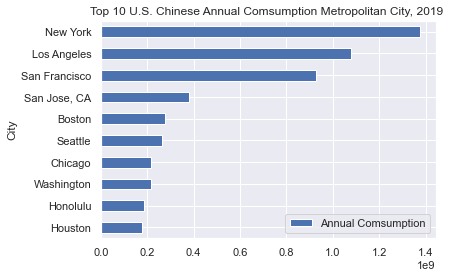

In [87]:
city_c = df_pop3.plot.barh(y='Annual Comsumption', x='City', rot=0, title="Top 10 U.S. Chinese Annual Comsumption Metropolitan City, 2019 ")

According to the above bar chart, we found out New York City, Los Angeles, and San Fancisco are twice as big than other cities. They are the best city to develop the chinese snacks' start up market. 

In [88]:
# read data from Github
df = pd.read_csv("https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/Asian%20Population%20in%20USA%202020.csv")

# To display the top 5 rows with 2020 Asian American
df.head()

,State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
0,Asian Population,76660,44032,257430,51839,6085947,199827,172455,42699,33545,...,135615,1585480,80438,11549,615436,730596,15109,175702,5212,4001


In [89]:
df_Asian = df.T # turn rows and columns

In [90]:
new_header = df_Asian.iloc[0] #grab the first row for the header
df1 = df_Asian[1:] #take the data less the header row
df1.columns = new_header #set the header row as the df header
print('2020 Asian Population in the USA')
df1

2020 Asian Population in the USA


State,Asian Population
Alabama,76660
Alaska,44032
Arizona,257430
Arkansas,51839
California,6085947
Colorado,199827
Connecticut,172455
Delaware,42699
District of Columbia,33545
Florida,643682


According to the research of Pew Research Center, Chinese takes up 24% of Asian population in the USA in 2019. 

In [91]:
df1.dtypes

State
Asian Population    object
dtype: object

In [92]:
df1.to_csv(r'C:\Users\13750\Desktop\Chinese pop Annual Comsumption.csv', index = True)

In [93]:
# convert object Asian Population as int
df1['Asian Population'] = df1['Asian Population'].astype(str).astype(int)


C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [119]:
# add column Chinese population 
chinese = df1['Asian Population'] * 0.24 
df1['Chinese Population'] = chinese.astype(int)

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
df1

State,Asian Population,Chinese Population
Alabama,76660,18398
Alaska,44032,10567
Arizona,257430,61783
Arkansas,51839,12441
California,6085947,1460627
Colorado,199827,47958
Connecticut,172455,41389
Delaware,42699,10247
District of Columbia,33545,8050
Florida,643682,154483


In [136]:
df4 = pd.read_csv('https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/Chinese%20pop%20Annual%20Comsumption.csv')
df4                

,Unnamed: 0,Asian Population,Chinese Population,Annual Comsumption
0,California,6085947,1460627,2322046825
1,New York,1933127,463950,737569915
2,Texas,1585480,380515,604927844
3,New Jersey,950090,228022,362499619
4,Illinois,754878,181171,288017964
5,Washington,730596,175343,278753351
6,Florida,643682,154484,245591975
7,Virginia,615436,147705,234814928
8,Hawaii,541902,130056,206758590
9,Pennsylvania,510501,122520,194777777


In [189]:
df5= df4
df6 = df5.rename(columns = {'Unnamed: 0': 'State', 'Annual Comsumption': 'Annual_Consumption'})

In [188]:
df6

,State,Asian Population,Chinese Population,Annual Comsumption,StAbbr,State
0,California,6085947,1460627,2322046825,CA,California
1,New York,1933127,463950,737569915,NY,New York
2,Texas,1585480,380515,604927844,TX,Texas
3,New Jersey,950090,228022,362499619,NJ,New Jersey
4,Illinois,754878,181171,288017964,IL,Illinois
5,Washington,730596,175343,278753351,WA,Washington
6,Florida,643682,154484,245591975,FL,Florida
7,Virginia,615436,147705,234814928,VA,Virginia
8,Hawaii,541902,130056,206758590,HI,Hawaii
9,Pennsylvania,510501,122520,194777777,PA,Pennsylvania


In [176]:
df5.to_csv(r'C:\Users\13750\Desktop\Chinese Annual Comsumption by States.csv', index = True)

In [177]:
df8.to_csv(r'C:\Users\13750\Desktop\Chinese Annual Comsumption by States3.csv', index = True)

In [178]:


df6 = df5
# Get Crosswalk From Generic Website
cw_location = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/'
cw_filename = 'state_codes.html'
states = pd.read_html(cw_location + cw_filename)[0]

# Create New Variable With State Abbreviations
state_code_map = dict(zip(states['Description'], 
                          states['Code']))
df6['StAbbr'] = df6['Unnamed: 0'].map(state_code_map)

# Demonstrate Reversing The Process
code_state_map = dict(zip(states['Code'],
                          states['Description']))
df6['State'] = df6['StAbbr'].map(code_state_map)

# Evaluate The Results
df7 = df6
df8 = df7.drop(['Unnamed: 0'], axis = 1)
df8

,Asian Population,Chinese Population,Annual Comsumption,StAbbr,State
0,6085947,1460627,2322046825,CA,California
1,1933127,463950,737569915,NY,New York
2,1585480,380515,604927844,TX,Texas
3,950090,228022,362499619,NJ,New Jersey
4,754878,181171,288017964,IL,Illinois
5,730596,175343,278753351,WA,Washington
6,643682,154484,245591975,FL,Florida
7,615436,147705,234814928,VA,Virginia
8,541902,130056,206758590,HI,Hawaii
9,510501,122520,194777777,PA,Pennsylvania


In [179]:
df9 = df8.head()
df9

,Asian Population,Chinese Population,Annual Comsumption,StAbbr,State
0,6085947,1460627,2322046825,CA,California
1,1933127,463950,737569915,NY,New York
2,1585480,380515,604927844,TX,Texas
3,950090,228022,362499619,NJ,New Jersey
4,754878,181171,288017964,IL,Illinois


In [190]:
df10 = df9.sort_values(by=['Annual Comsumption'])

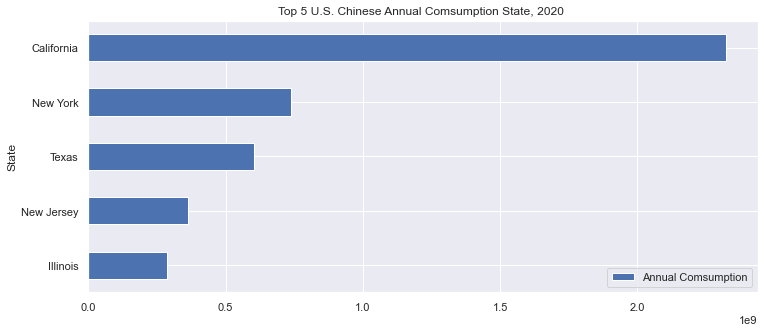

In [193]:
state_c = df10.plot.barh(y='Annual Comsumption', x='State', rot=0, title="Top 5 U.S. Chinese Annual Comsumption State, 2020 ")

In [98]:
import geopandas as gpd
import pandas
import matplotlib.pyplot as plt
import contextily as ctx   # https://blog.matthewgove.com/2021/07/23/python-tutorial-how-to-create-a-choropleth-map-using-region-mapping/

In [99]:
# Load file
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)

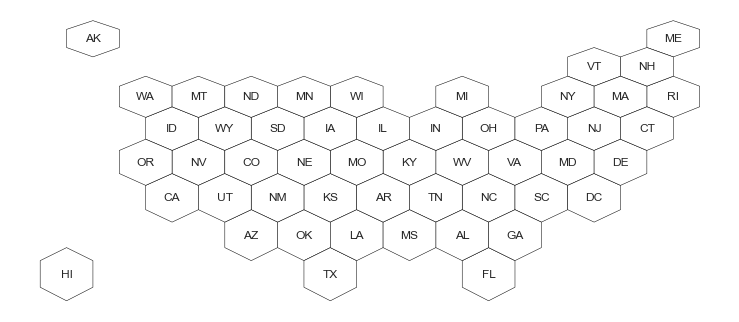

In [25]:
# add a "centroid" column with the centroid position of each county
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)

# redraw the empty hexbin map:
geoData.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');

# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    plt.annotate(s=row['iso3166_2'], xy=row['centroid'].coords[0], horizontalalignment='center', va='center')

### Main Sellers and Selling Status

In [ ]:
## https://alternateapp.com/app/981366229/yamibuy-asian-grocery-delivery

In [140]:
seller1 = pd.read_csv('https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/competitors%20info%20by%20Chinese%20population_Online%20Shopping%20%20-%20Sheet1.csv')
seller1

,Company,Year,Revenue_estimate_millions,Fund_millions,Web,source,developing message
0,Yamibuy,2021.0,35.40,$10,https://www.yamibuy.com/,https://growjo.com/company/Yamibuy.Com,1. https://baijiahao.baidu.com/s?id=1641896605...
1,Weee!,2021.0,78.30,$398.80,https://www.sayweee.com/,https://growjo.com/company/Weee!,NaN
2,DealMoon,2021.0,62.20,0,https://www.dealmoon.com/en,https://growjo.com/company/Dealmoon,NaN
3,Kouhigh,2021.0,1.00,NaN,https://www.kouhigh.com/,NaN,NaN
4,FreshGoGo,2021.0,5.00,NaN,https://www.freshgogo.com/,https://incfact.com/company/freshgogo-collegep...,revenue around 1- 10M
5,Other,2021.0,40.00,NaN,NaN,NaN,NaN
6,Potential Empty Market,NaN,"8,361.10",NaN,NaN,NaN,NaN


In [148]:
seller1.dtypes

Company                       object
Year                         float64
Revenue_estimate_millions     object
Fund_millions                 object
Web                           object
source                        object
developing message            object
dtype: object

In [152]:
seller1['Revenue_estimate_millions'].replace({',': ''})

0       35.40
1       78.30
2       62.20
3        1.00
4        5.00
5       40.00
6    8,361.10
Name: Revenue_estimate_millions, dtype: object

# Visualization And Summary

### 1. Chinese Product Market Overview

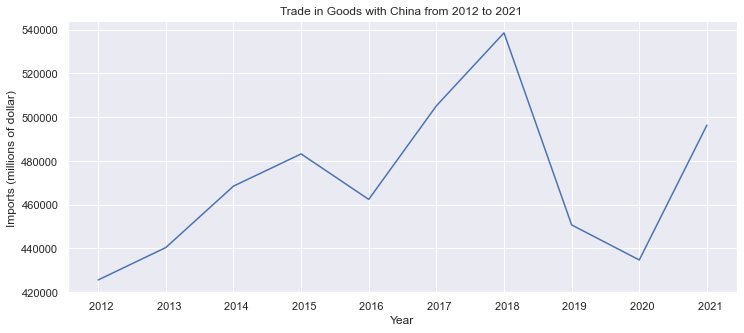

In [108]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(T1.Year, T1.Imports)
plt.title('Trade in Goods with China from 2012 to 2021 ')
plt.xlabel('Year')
plt.ylabel('Imports (millions of dollar) ')
plt.show()

During 2012 to 2021, **the average US Trading in Goods wirh China**: 471 billions. 

**Chinese Snack Market(estimate)**: 23.6 billions ---According to the report of Department of Agriculture, snack food takes up 5% of U.S. average imports from China.

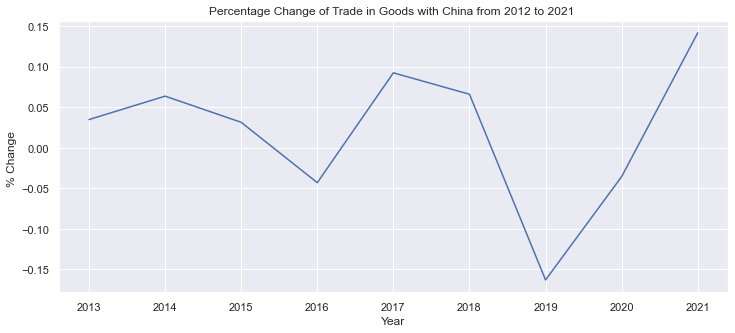

In [109]:
plt.plot(T2.Year, T2.Imports_pct_change)
plt.title('Percentage Change of Trade in Goods with China from 2012 to 2021 ')
plt.xlabel('Year')
plt.ylabel('% Change ')
plt.show()

**Percentage Change of USA Import from China from 2013 to 2021**

- Overall imports % change: 2.1 % 
- Before the pandemic (2020), the average % change: 1.2 %
- After pandemic(2021), % change: 14.17%.

from PIL import Image

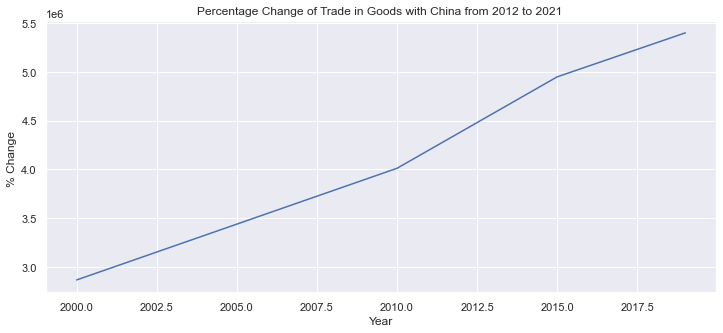

In [163]:
plt.plot(df_pop.Year, df_pop.Population)
plt.title('Percentage Change of Trade in Goods with China from 2012 to 2021 ')
plt.xlabel('Year')
plt.ylabel('% Change ')
plt.show()

In [165]:
8.6/471

0.018259023354564755